In [ ]:
import sklearn
from sklearn.neighbors import KernelDensity

import kalepy as kale
import matplotlib.pyplot as plt
from kalepy.plot import nbshow

dffull = df1
dfnobin = df1[df1.LABELS > -1]
dfbin = df1[df1.LABELS == -1]
labelbiggest = df1['LABELS'].value_counts().sort_values(ascending=False).iloc[1:11].index
df10biggest = df1.loc[df1.LABELS.isin(labelbiggest)]
labelsmallest = df1['LABELS'].value_counts().sort_values(ascending=True).iloc[0:110].index
dfsmallest = df1.loc[df1.LABELS.isin(labelsmallest)]


biggest_storm = dfnobin.loc[dfnobin['LABELS']==dfnobin['LABELS'].value_counts().sort_values(ascending=False).index[0],]
biggest_storm = biggest_storm.drop(columns=['LABELS'])
secondbig = dfnobin.loc[dfnobin['LABELS']==dfnobin['LABELS'].value_counts().sort_values(ascending=False).index[1],]
secondbig = secondbig.drop(columns=['LABELS'])
thirdbig = dfnobin.loc[dfnobin['LABELS']==dfnobin['LABELS'].value_counts().sort_values(ascending=False).index[2],]
thirdbig = thirdbig.drop(columns=['LABELS'])


kde = KernelDensity(kernel='tophat', bandwidth=0.01).fit(biggest_storm)
log_dens = kde.score_samples(biggest_storm)
density = np.exp(log_dens)
df_kernel = biggest_storm
df_kernel['DENSITY'] = density 
# plot timing of storms in latlon

df_kernel = df_kernel.drop(columns = ['TIME_EVENT'])
df_kernel

,LATITUDE,LONGITUDE,DENSITY
1628,44.894,0.903,2040.447988
1629,44.883,0.887,2040.447988
1630,44.863,0.853,4080.895977
1631,44.856,0.848,4080.895977
1632,44.867,0.783,2040.447988
...,...,...,...
1741,44.774,0.078,2040.447988
1742,44.767,0.086,2040.447988
1743,44.762,0.071,2040.447988
1744,44.750,0.080,4080.895977


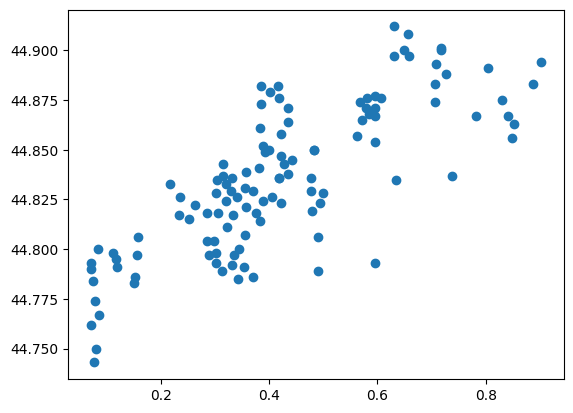

In [ ]:
plt.scatter(df_kernel.LONGITUDE,df_kernel.LATITUDE)

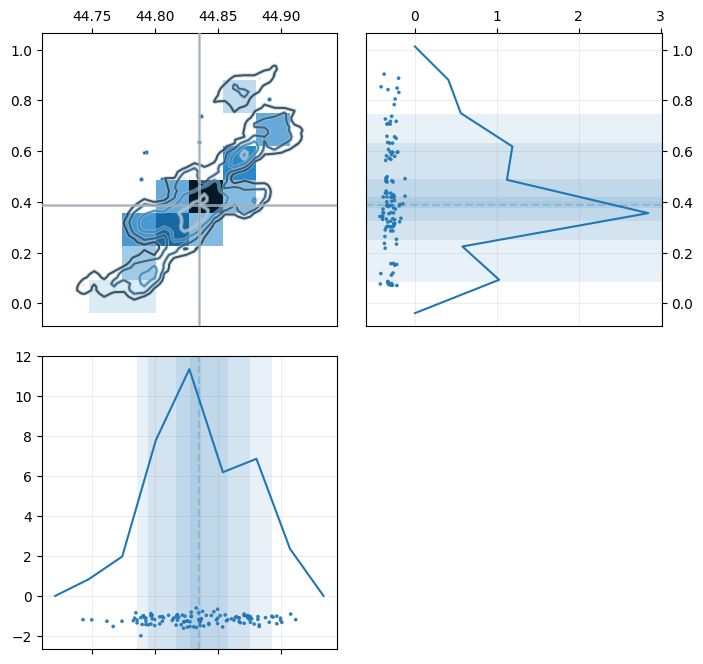

In [ ]:
data = df_kernel[['LATITUDE', 'LONGITUDE']]
data = np.transpose(data)

kern = 'epanechnikov'
bw = 0.4
kde = kale.KDE(data, kernel=kern, bandwidth=bw)  
corner = kale.Corner(data)    
corner.plot(kde_data = kde)

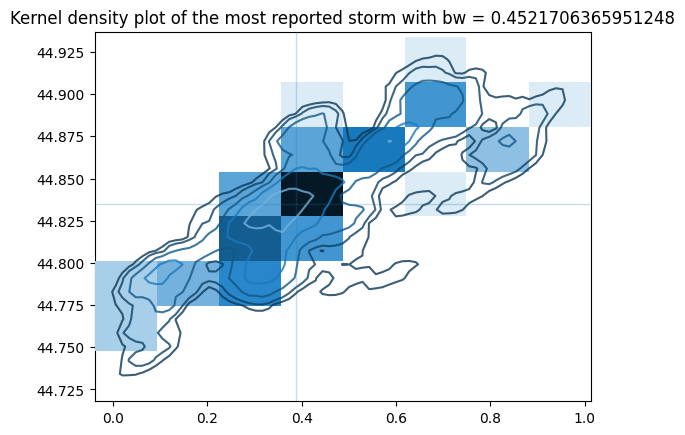

In [ ]:
# scott optimal bandwith 
data = df_kernel[['LONGITUDE', 'LATITUDE']]
x = data.LONGITUDE
y = data.LATITUDE
data = np.transpose(data)
kern = 'epanechnikov'
bw = 'scott'
sigmas = np.arange(0, 3, 0.5) # array_like of positive scalar values denoting contour levels

kde = kale.KDE(data, kernel=kern, bandwidth=bw) 

fig, ax = plt.subplots()
ax.set_title("Kernel density plot of the most reported storm with bw = {}".format(kde.bandwidth[0, 0]))
kale.dist2d(kde, ax=ax, hist=True, sigmas=np.arange(0, 3, 0.5), outline= False, scatter=False, median= True, mask_dense=False, mask_below = True)



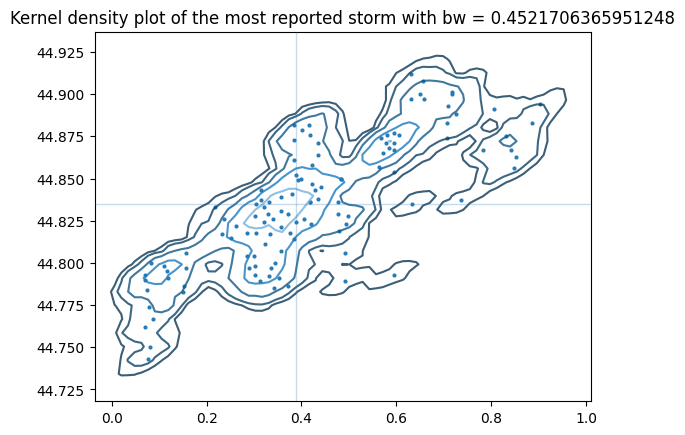

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Kernel density plot of the most reported storm with bw = {}".format(kde.bandwidth[0, 0]))
kale.dist2d(kde, ax=ax, hist=False, sigmas=np.arange(0, 3, 0.5), outline= False, scatter=True, median= True, mask_dense=False, mask_below = True)


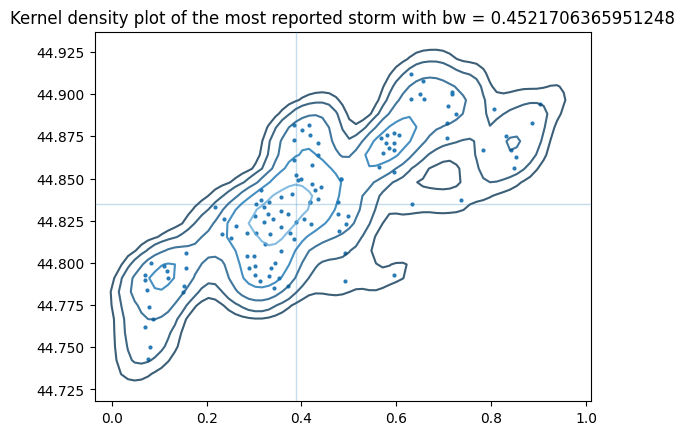

In [ ]:
# scott optimal bandwith 
data = df_kernel[['LONGITUDE', 'LATITUDE']]
x = data.LONGITUDE
y = data.LATITUDE
data = np.transpose(data)
kern = 'epanechnikov'
bw = 'scott'
sigmas = np.arange(0, 3, 0.5) # array_like of positive scalar values denoting contour levels

kde = kale.KDE(data, kernel=kern, bandwidth=bw) 
fig, ax = plt.subplots()
ax.set_title("Kernel density plot of the most reported storm with bw = {}".format(kde.bandwidth[0, 0]))
kale.dist2d(kde, ax=ax, hist=False, sigmas=np.arange(0, 3, 0.5), smooth=True, outline= False, scatter=True, median= True, mask_dense=False, mask_below = True)


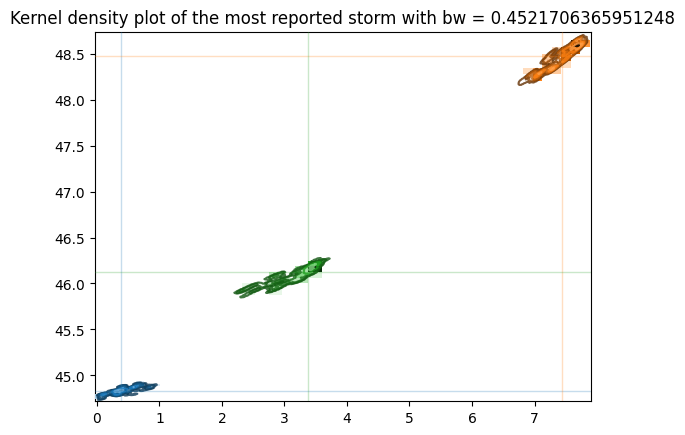

In [ ]:
# scott optimal bandwith 
data = df_kernel[['LONGITUDE', 'LATITUDE']]
x = data.LONGITUDE
y = data.LATITUDE
data = np.transpose(data)
kern = 'epanechnikov'
bw = 'scott'
sigmas = np.arange(0, 3, 0.5) # array_like of positive scalar values denoting contour levels

kde = kale.KDE(data, kernel=kern, bandwidth=bw)  

data1 = secondbig[['LONGITUDE', 'LATITUDE']]
x = data1.LONGITUDE
y = data1.LATITUDE
data1 = np.transpose(data1)
kern = 'epanechnikov'
bw = 'scott'
sigmas = np.arange(0, 3, 0.5) # array_like of positive scalar values denoting contour levels

kde1 = kale.KDE(data1, kernel=kern, bandwidth=bw)  

data2 = thirdbig[['LONGITUDE', 'LATITUDE']]
x = data2.LONGITUDE
y = data2.LATITUDE
data2 = np.transpose(data2)
kern = 'epanechnikov'
bw = 'scott'
sigmas = np.arange(0, 3, 0.5) # array_like of positive scalar values denoting contour levels

kde2 = kale.KDE(data2, kernel=kern, bandwidth=bw)  


fig, ax = plt.subplots()
ax.set_title("Kernel density plot of the 3 most reported storm with bw = {}".format(kde.bandwidth[0, 0]))
kale.dist2d(kde, ax=ax, hist=True, sigmas=np.arange(0, 3, 0.5), outline= False, scatter=False, median= True, mask_dense=False, mask_below = True)
kale.dist2d(kde1, ax=ax, hist=True, sigmas=np.arange(0, 3, 0.5), outline= False, scatter=False, median= True, mask_dense=False, mask_below = True)
kale.dist2d(kde2, ax=ax, hist=True, sigmas=np.arange(0, 3, 0.5), outline= False, scatter=False, median= True, mask_dense=False, mask_below = True)

#ax.clabel(handle, inline=True, fontsize=10)

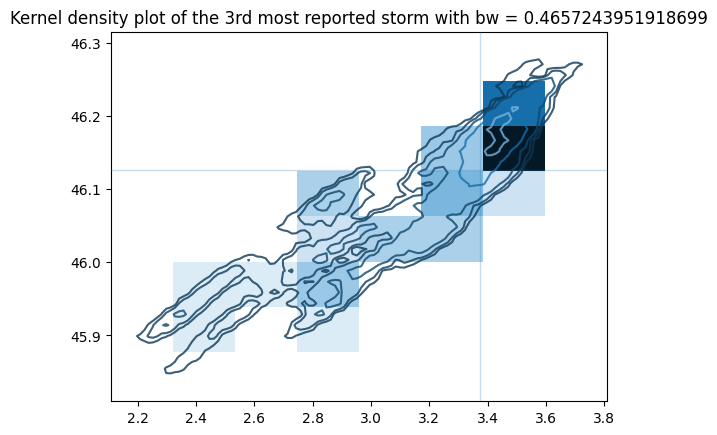

In [ ]:

data2 = thirdbig[['LONGITUDE', 'LATITUDE']]
x = data2.LONGITUDE
y = data2.LATITUDE
data2 = np.transpose(data2)
kern = 'epanechnikov'
bw = 'scott'
sigmas = np.arange(0, 1, 0.1) # array_like of positive scalar values denoting contour levels


fig, ax = plt.subplots()
ax.set_title("Kernel density plot of the 3rd most reported storm with bw = {}".format(kde2.bandwidth[0, 0]))
kde2 = kale.KDE(data2, kernel=kern, bandwidth=bw)  
kale.dist2d(kde2, ax=ax, hist=True, sigmas=np.arange(0, 3, 0.5), outline= False, scatter=False, median= True, mask_dense=False, mask_below = True)
